# Workshop 4

* Data visualization with matplotlib and seaborn

In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
# read in data
gss = pd.read_csv('GSS.2006.csv')

In [3]:
gss.columns # too many columns, can't see all

Index(['vpsu', 'vstrat', 'adults', 'ballot', 'dateintv', 'famgen', 'form',
       'formwt', 'gender1', 'hompop',
       ...
       'away7', 'gender14', 'old14', 'relate14', 'relhh14', 'relhhd14',
       'relsp14', 'where12', 'where6', 'where7'],
      dtype='object', length=1261)

In [4]:
# use a for loop to print them all
for c in gss.columns:
    print(c)

vpsu
vstrat
adults
ballot
dateintv
famgen
form
formwt
gender1
hompop
id
intage
intid
intyrs
mode
oversamp
phase
race
reg16
region
relate1
relhh1
relhhd1
respnum
rvisitor
sampcode
sample
sex
size
spaneng
srcbelt
version
visitors
wtss
wtssall
wtssnr
xnorcsiz
year
hispanic
rplace
degree
hefinfo
wrkstat
racecen1
marital
phone
comprend
coop
feeused
hhrace
lngthinv
educ
childs
ethnum
age
cohort
intrace1
attend
inthisp
hhtype
hhtype1
earnrs
whoelse6
whoelse1
whoelse2
whoelse3
whoelse4
whoelse5
partyid
relig
teens
preteen
babies
reliten
dwelling
vote04
mar1
zodiac
old1
fund
polviews
income
income06
wrkslf
isco681
isco88
occ80
prestg80
wrkgovt
sei
intethn
intsex
indus80
eth1
trust
realinc
coninc
ethnic
health
union
gender2
relate2
relhh2
relhhd2
wksub
wksup
old2
mar2
widowed
unrelat
born
saqsex
weekswrk
family16
relig16
res16
sibs
parborn
happy
mobile16
satfin
finalter
relactiv
relexper
savesoul
class
pray
relpersn
relexp
god
reborn
finrela
sprtprsn
rellife
pres04
bible
vote00
rotapple
blkwhite

In [5]:
# subset the dataset - why? i) leave the raw dataframe for reference, ii) smaller sized, easier to compute
sub_gss = gss[['sex', 'realinc', 'educ', 'race']]

In [6]:
sub_gss.head() # check

,sex,realinc,educ,race
0,2,18476.25,13.0,2
1,1,46901.25,14.0,3
2,2,NaN,9.0,1
3,2,25582.50,12.0,2
4,1,NaN,14.0,2


In [7]:
# Recode variable sex and call the recoded variable sex2
# In original 1 is male, 2 is female. Recoded one makes 1 male and 0 for female
sub_gss['sex2'] = [val if val == 1 else 0 for val in sub_gss['sex']]

C:\Users\bolim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
sub_gss.head() # check

,sex,realinc,educ,race,sex2
0,2,18476.25,13.0,2,0
1,1,46901.25,14.0,3,1
2,2,NaN,9.0,1,0
3,2,25582.50,12.0,2,0
4,1,NaN,14.0,2,1


In [9]:
# Recode variable race and call it black
# 1 if the respondent's race is black (race is 2), 0 if otherwise (race is 1 or 3)
sub_gss['black'] = [1 if val == 2 else 0 for val in sub_gss['race']] 

C:\Users\bolim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
sub_gss.head() # check

,sex,realinc,educ,race,sex2,black
0,2,18476.25,13.0,2,0,1
1,1,46901.25,14.0,3,1,0
2,2,NaN,9.0,1,0,0
3,2,25582.50,12.0,2,0,1
4,1,NaN,14.0,2,1,1


In [11]:
# Run a regression
# Predict real income as a function of years of education, sex and race
# use C() to treat the independent variable as a categorical variable
model = ols(formula = 'realinc ~ educ*C(sex2) + C(black)', data = sub_gss).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                realinc   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     168.0
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          8.31e-133
Time:                        09:21:23   Log-Likelihood:                -45368.
No. Observations:                3866   AIC:                         9.075e+04
Df Residuals:                    3861   BIC:                         9.078e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.251e+04   2973.51

* Interpreting interaction terms:

For each additional of year of education, females earn 3346.4433 dollars more. For each additional year of education, males earn 3794.4678(3346.4433+448.0245) dollars more.


* Interpreting dummy variables:

Controlling for sex and years of education, on average, black people earn 1.034e+04 dollars less.

# Histograms

For linear regression, when a variable is logged, the scales are adjusted and hence values that are outliers are less influential.

Below are some codes to check the distribution of the dependent variable `realinc` (real income in dollars), and how it is logged.

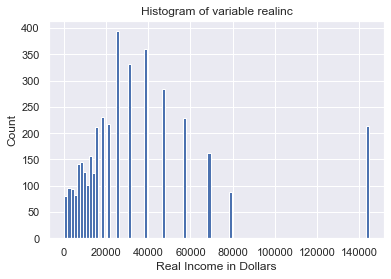

In [17]:
sns.set() # set the template

_ = plt.hist(sub_gss['realinc'], bins = 100) # plot a histogram
_ = plt.xlabel('Real Income in Dollars') # x-axis name
_ = plt.ylabel('Count') # y-axis name
_ = plt.title('Histogram of variable realinc') # Give a title to the visualization

The distribution shows that real income has wide variance in values (0 to 140,000 and more). Below are codes used to log the dependent variable.

In [18]:
import numpy as np # import the numpy package for logging

In [19]:
sub_gss['realinc_log'] = np.log((sub_gss['realinc'] + 1)) # new column. add 1 because one cannot log 0.

C:\Users\bolim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
sub_gss.head() # check

,sex,realinc,educ,race,sex2,black,realinc_log
0,2,18476.25,13.0,2,0,1,9.824296
1,1,46901.25,14.0,3,1,0,10.755821
2,2,NaN,9.0,1,0,0,NaN
3,2,25582.50,12.0,2,0,1,10.149703
4,1,NaN,14.0,2,1,1,NaN


In [21]:
np.log(18476.25) # check

9.824241402526283

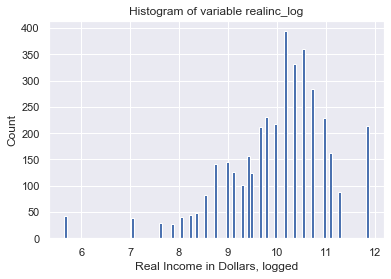

In [22]:
# Create visualization for the logged values

_ = plt.hist(sub_gss['realinc_log'], bins = 100)
_ = plt.xlabel('Real Income in Dollars, logged')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of variable realinc_log')

The distribution looks more normal and better scaled for linear regression analysis. The model is run again, but this time, the dependent variable is logged.

In [23]:
model2 = ols(formula = 'realinc_log ~ educ*C(sex2) + C(black)', data = sub_gss).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            realinc_log   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     206.8
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          5.67e-161
Time:                        09:33:07   Log-Likelihood:                -5312.6
No. Observations:                3866   AIC:                         1.064e+04
Df Residuals:                    3861   BIC:                         1.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.2162      0.09

When the dependent variable is logged, adjusted R-squared increases. `model2` can explain more variablility than `model1`. This shows that without extra variables, logging helps to increase model performance.


* Interpreting log - level model: Percentage

For females (base - `sex2` is 0), for each additional year of education, on average, has _12.92%_ increase for income. For males, for each additional year of education, on average, has _11.29%_ increase for income. (11.29 = (0.1292 - 0.0163)*100)

# Residual Plot

Residual plots help to diagnose the model performance in depth

In [24]:
sub_gss['yhat_model2'] = model2.fittedvalues # get fitted values for yhat (call it yhat_model2)

C:\Users\bolim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
sub_gss.head()

,sex,realinc,educ,race,sex2,black,realinc_log,yhat_model2
0,2,18476.25,13.0,2,0,1,9.824296,9.433546
1,1,46901.25,14.0,3,1,0,10.755821,10.238911
2,2,NaN,9.0,1,0,0,NaN,NaN
3,2,25582.50,12.0,2,0,1,10.149703,9.304350
4,1,NaN,14.0,2,1,1,NaN,NaN


In [26]:
sub_gss['resid_model2'] = sub_gss['realinc_log'] - sub_gss['yhat_model2'] # Residuals

C:\Users\bolim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
sub_gss.head()

,sex,realinc,educ,race,sex2,black,realinc_log,yhat_model2,resid_model2
0,2,18476.25,13.0,2,0,1,9.824296,9.433546,0.390750
1,1,46901.25,14.0,3,1,0,10.755821,10.238911,0.516910
2,2,NaN,9.0,1,0,0,NaN,NaN,NaN
3,2,25582.50,12.0,2,0,1,10.149703,9.304350,0.845353
4,1,NaN,14.0,2,1,1,NaN,NaN,NaN


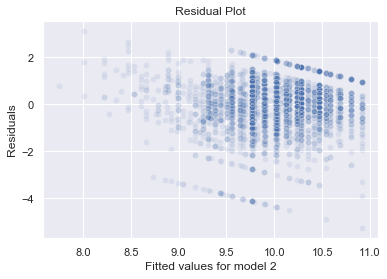

In [37]:
# Residual plot
_ = sns.scatterplot(x = 'yhat_model2', y = 'resid_model2', data = sub_gss, alpha = 0.1)
_ = plt.xlabel('Fitted values for model 2')
_ = plt.ylabel('Residuals')
_ = plt.title('Residual Plot')

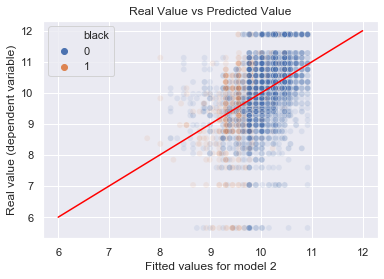

In [38]:
# Real value vs predicted value
# Added alpha to make the dots transparent
# Added hue to specify black or not (1 = black, 0 = not black)
_ = sns.scatterplot(x = 'yhat_model2', y = 'realinc_log', data = sub_gss, alpha = 0.1, hue = 'black')
_ = plt.xlabel('Fitted values for model 2')
_ = plt.ylabel('Real value (dependent variable)')
_ = plt.plot([6,12], [6,12], color = 'red') # A line where real value equals the predicted value
_ = plt.title('Real Value vs Predicted Value')

Since the model has `black` as a dummy varable, the model cannot capture high-earning black population. 
Points above the line is where real value is greater than the predicted value. Points below the line is where predicted value is greater than the real value.